In [13]:
import pandas as pd

In [64]:
basketball_url = pd.read_html('https://www.foxsports.com/nba/stats?season=2018&category=ADVANCED&group=1&sort=5&time=0&pos=0&team=0&qual=1&sortOrder=0&opp=0&page=1')
df = basketball_url[0]
basketball_url1 = pd.read_html('https://www.foxsports.com/nba/stats?season=2018&category=ADVANCED&group=1&sort=5&time=0&pos=0&team=0&qual=1&sortOrder=0&opp=0&page=2')
df1 = basketball_url1[0]
basketball_url2 = pd.read_html('https://www.foxsports.com/nba/stats?season=2018&category=ADVANCED&group=1&sort=5&time=0&pos=0&team=0&qual=1&sortOrder=0&opp=0&page=3')
df2 = basketball_url2[0]
basketball_url3 = pd.read_html('https://www.foxsports.com/nba/stats?season=2018&category=ADVANCED&group=1&sort=5&time=0&pos=0&team=0&qual=1&sortOrder=0&opp=0&page=4')
df3 = basketball_url3[0]

In [110]:
basketball = pd.concat([df, df1, df2, df3])

In [111]:
nba = basketball[['ADVANCED', 'OFF RTG', 'DEF RTG', 'MPG']]

In [112]:
nba_offense = nba.sort_values('OFF RTG',ascending=False)

In [113]:
nba_defense = nba.sort_values('DEF RTG',ascending=False)

In [114]:
nba_mpg = nba.sort_values('MPG',ascending=False)

In [52]:
# normalize offense 50/50
bball_offense_normalized_half = (basketball['OFF RTG']/134.6) * 0.5
# normalize defense 50/50
bball_defense_normalized_half = (basketball['DEF RTG']/132.0) * 0.5
# normalize mpg
bball_mpg_normalized = (basketball['MPG']/36.9)
nba['Normalized NBA Score'] = (bball_offense_normalized_half + bball_defense_normalized_half) * bball_mpg_normalized

C:\Users\jodiy\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [98]:
final_nba_half = nba.sort_values('Normalized NBA Score',ascending=False)
nba_dataset_half = final_nba_half.reset_index()

In [115]:
# nba_dataset_half

Pokemon Dataset

In [23]:
pokemon_csv = pd.read_csv('data/Pokemon.csv')

In [75]:
poke = pokemon_csv[~pokemon_csv.Name.str.contains('Mega', 'Primal')]
poke_1 = poke[~poke.Name.str.contains("Primal")]

In [104]:
poke1 = poke_1[['Name','Attack', 'Defense','Generation']]

In [105]:
poke2 = poke1[(poke1['Generation']) != 5]
pokemon = poke2[(poke2['Generation']) != 6]

In [116]:
pokemon_offense = pokemon.sort_values('Attack',ascending=False)

In [117]:
pokemon_defense = pokemon.sort_values('Defense',ascending=False)

In [108]:
# normalize offense 50/50
poke_offense_normalized_half = (pokemon['Attack']/180) * 0.5
# normalize defense 50/50
poke_defense_normalized_half = (pokemon['Defense']/230) * 0.5
pokemon['Normalized Pokemon Score'] = poke_offense_normalized_half + poke_defense_normalized_half

C:\Users\jodiy\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [95]:
final_pokemon_half = pokemon.sort_values('Normalized Pokemon Score',ascending=False)
pokemon_dataset_half = final_pokemon_half.reset_index()

In [118]:
data_joined = pd.concat([nba_dataset_half, pokemon_dataset_half], axis=1, sort=False)

In [109]:
data_filtered = data_joined[['ADVANCED', 'Normalized NBA Score', 'Normalized Pokemon Score', 'Name']]
data_filtered.head(25)

,ADVANCED,Normalized NBA Score,Normalized Pokemon Score,Name
0,"Beal, Bradley Beal, B. WAS",0.854581,0.721014,Groudon
1,"50 Harden, James Harden, J. HOU",0.846242,0.712560,Regirock
2,"Lillard, Damian Lillard, D. POR",0.842003,0.696860,Aggron
3,"15 George, Paul George, P. OKC",0.828604,0.683575,Regigigas
4,"45 Capela, Clint Capela, C. HOU",0.822027,0.671498,Rhyperior
5,"Holiday, Jrue Holiday, J. NOP",0.816108,0.670894,Steelix
6,"Durant, Kevin Durant, K. GSW",0.811107,0.661836,Slaking
7,"Booker, Devin Booker, D. PHX",0.809081,0.657609,Metagross
8,"Walker, Kemba Walker, K. CHA",0.800478,0.655193,Cloyster
9,"47 James, LeBron James, L. LAL",0.794913,0.621981,Rhydon


In [37]:
import matplotlib.pyplot as plt

In [38]:
%matplotlib inline

Text(0.5,1,'NBA Players vs Pokemon Normalized Score')

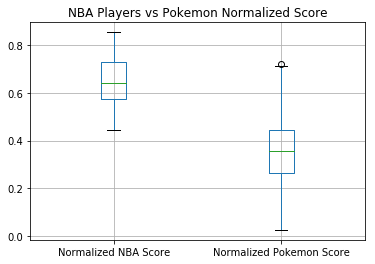

In [101]:
boxplot = data_filtered.boxplot(column=['Normalized NBA Score', 'Normalized Pokemon Score'])
boxplot.set_title('NBA Players vs Pokemon Normalized Score')